In [1]:
%matplotlib inline

import os
# assumes jupyter server launched from root dir of repo
filepath = os.path.abspath(os.path.join(os.getcwd(), '..'))
%cd $filepath

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append(os.path.abspath(filepath))

from common import *
from cces_util import *
from notebooks.eval_util import *

/Users/cyz/survey/active_survey


Using TensorFlow backend.


In [2]:
# Suppress verbose warnings about missing fonts
import warnings
warnings.simplefilter('ignore')

In [3]:
dataset = 'cces16_free_covariates'
sim_objects_filename = '{}/data/{}-sim-objects.pkl'.format(filepath, dataset)
response_filename = filepath + '/data/cces/cces16_full_cs.csv'
question_filename = filepath + "/data/cces/cces16_questions_short.csv"

In [4]:
sim_objects = deserialize(sim_objects_filename)

In [5]:
responses = pd.read_csv(response_filename, index_col=0)
questions = responses.columns.tolist()

In [6]:
metadata_filename = filepath + "/data/cces/CCES16_Common_OUTPUT_Feb2018_VV-ddi.xml"
question_to_label = parse_question_metadata(metadata_filename)
[question_to_label.get(q) for q in questions]

['National Economy',
 'Past year - household income',
 'Next year - household income',
 'Police make R feel safe',
 'Approve of Job - Obama',
 'Approve of Job - Congress',
 'Approve of Job - Supreme Court',
 'Gun Control - Background checks for all sales, including at gun shows and over t',
 'Gun Control - Prohibit state and local governments from publishing the names and',
 'Gun Control - Ban assault rifles',
 'Gun Control - Make it easier for people to obtain concealed-carry permit',
 'Immigration - Grant legal status to all illegal immigrants who have held jobs an',
 'Immigration - Increase the number of border patrols on the U.S.-Mexican border',
 'Immigration - Grant legal status to people who were brought to the US illegally ',
 'Immigration - Identify and deport illegal immigrants',
 'Immigration - None of these',
 'Abortion Policies - Always allow a woman to obtain an abortion as a matter of ch',
 'Abortion Policies - Permit abortion only in case of rape, incest or when the wom

In [7]:
question_df = pd.read_csv(question_filename, index_col=0)
question_to_short_label = {row['question']: row['text'] for index, row in question_df.iterrows()}
question_to_label.update(question_to_short_label)

In [8]:
alpha = 1

Extracting cache for 10 simulations
Extracting cache for 1 simulations
Extracting cache for 10 simulations


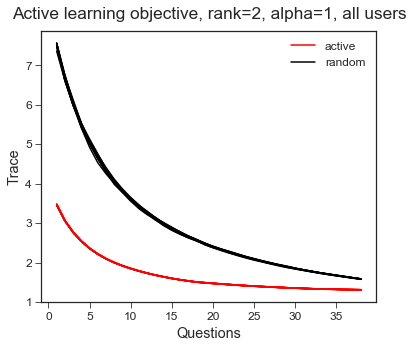

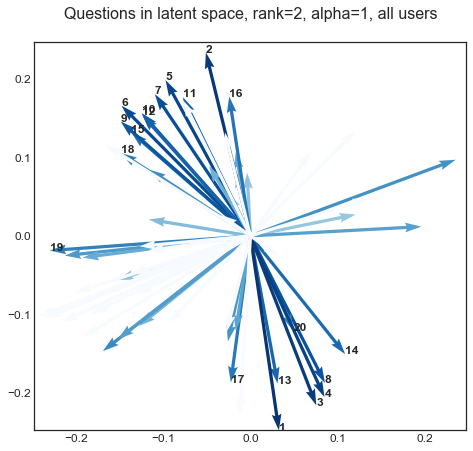

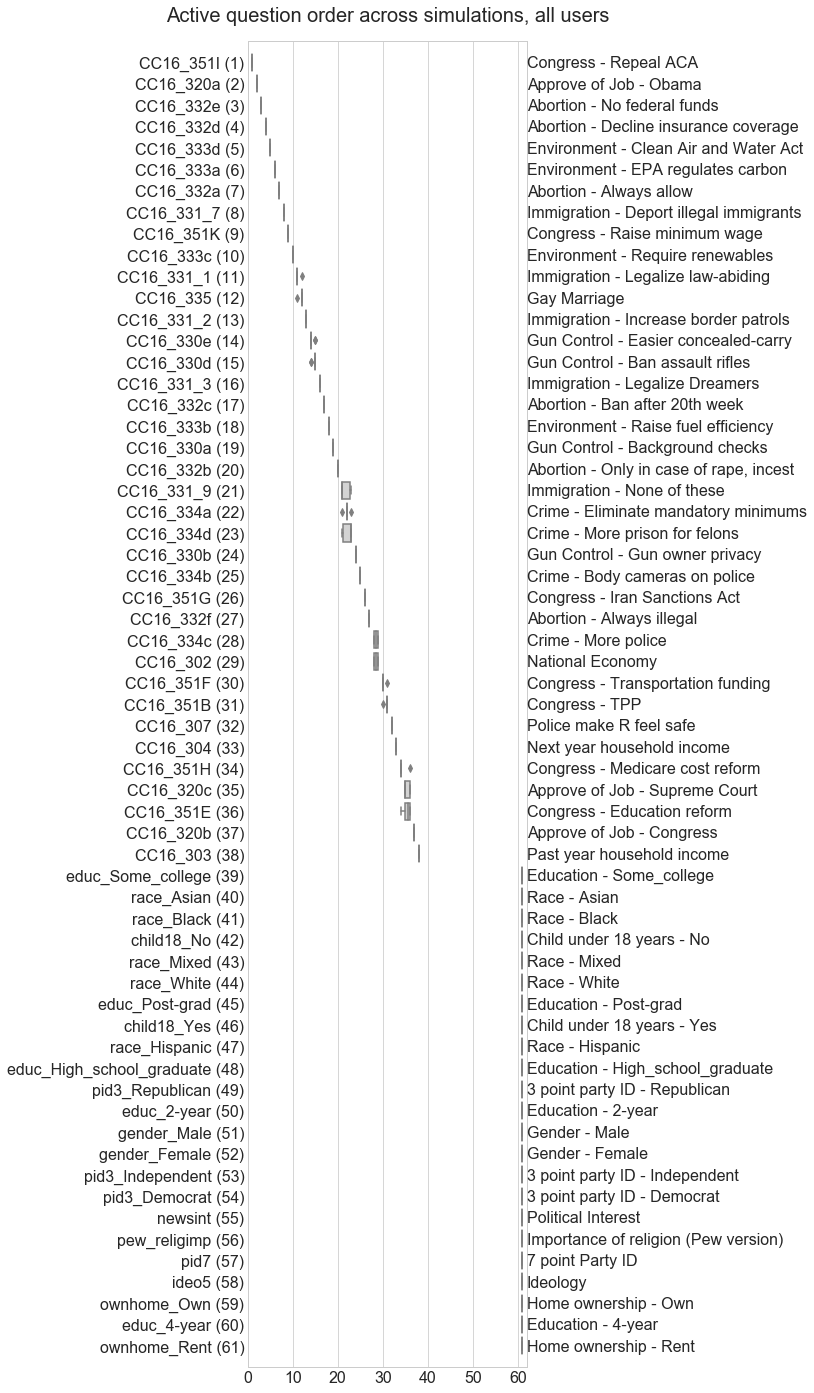

In [9]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})
# note: objective plot doesn't make free covariates available to random; don't use
plot_objective(sim_objects,
               rank=2, optimality_type='A', v_method='row-norm', alpha=alpha)
plot_question_order(sim_objects, questions,
                    rank=2, optimality_type='A', v_method='row-norm', alpha=alpha,
                    max_labels=20, max_plots=1)
plot_question_ranks(sim_objects, questions,
                    rank=2, optimality_type='A', v_method='row-norm', alpha=alpha,
                    show_question_labels=True, question_to_label=question_to_label)

Extracting cache for 10 simulations


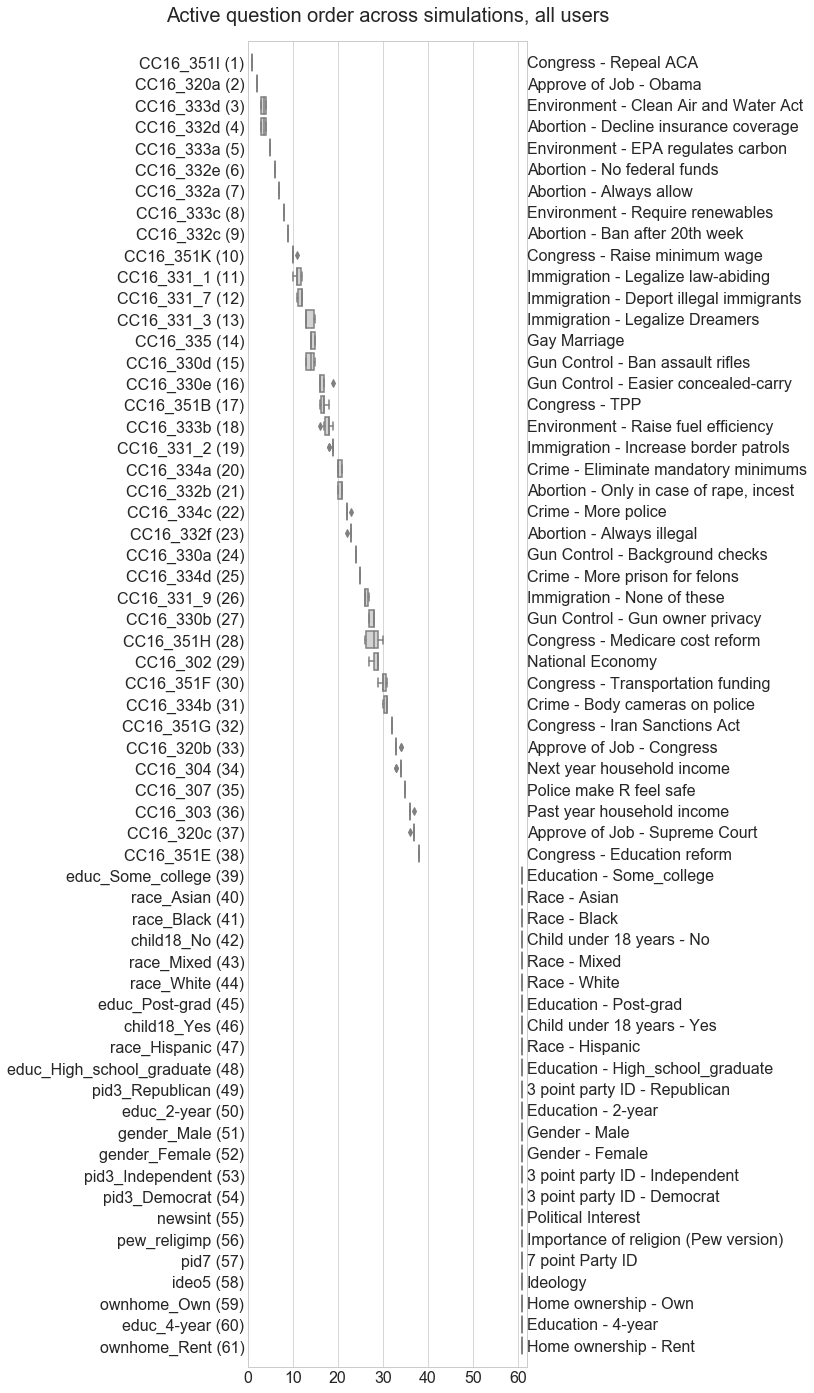

In [10]:
plot_question_ranks(sim_objects, questions,
                    rank=4, optimality_type='A', v_method='row-norm', alpha=alpha,
                    show_question_labels=True, question_to_label=question_to_label)

Extracting cache for 10 simulations


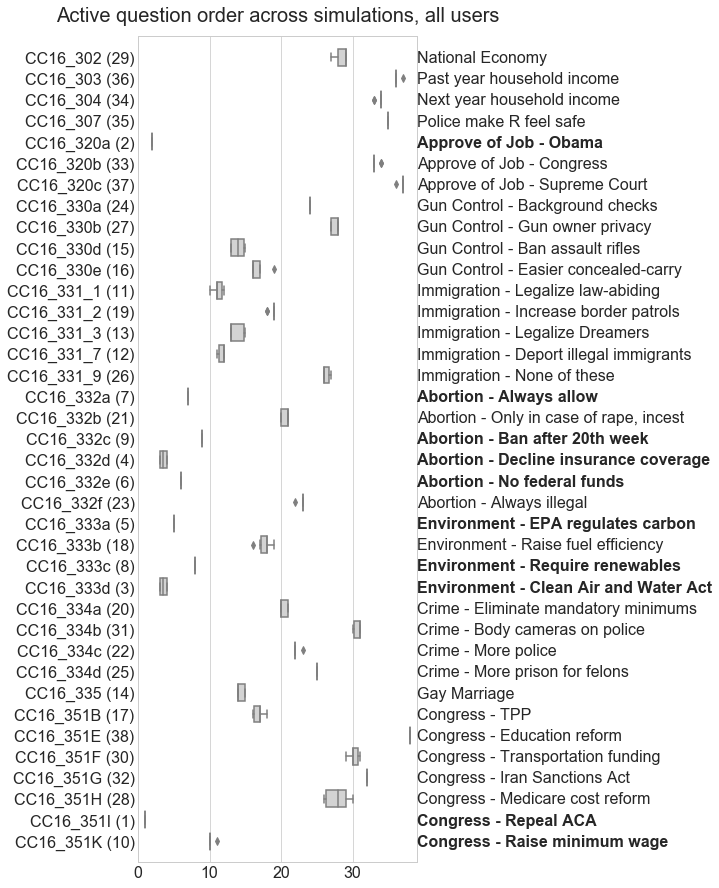

In [11]:
plot_question_ranks(sim_objects, questions,
                    rank=4, optimality_type='A', v_method='row-norm', alpha=alpha,
                    show_question_labels=True, question_to_label=question_to_label, 
                    sort_by_rank=False, show_max_questions=38)

In [12]:
# display_V(sim_objects, questions, question_to_label,
#           rank=4, optimality_type='A', v_method='row-norm', alpha=alpha)